# Attempting to use Multiple Regression

Attribute Information:
   -- Only 14 used
      -- 1. #3  (age)       
      -- 2. #4  (sex)       
      -- 3. #9  (cp)        
      -- 4. #10 (trestbps)  
      -- 5. #12 (chol)      
      -- 6. #16 (fbs)       
      -- 7. #19 (restecg)   
      -- 8. #32 (thalach)   
      -- 9. #38 (exang)     
      -- 10. #40 (oldpeak)   
      -- 11. #41 (slope)     
      -- 12. #44 (ca)        
      -- 13. #51 (thal)      
      -- 14. #58 (num)       (the predicted attribute)

## Imports

In [10]:
from sklearn.linear_model import LinearRegression
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import numpy as np

## Reading and Storing the Dataset

In [11]:
dataset = pandas.read_csv("processed.cleveland.data")
dataset

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


## Preprocessing the data and the model

In [12]:
model = LinearRegression()
dataset = dataset.replace('?', None)
dataset.dropna(inplace=True)

xs = dataset.iloc[:, 0:13]
ys = dataset.iloc[:,-1]

## Normalising the dataset

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

xs = scaler.fit_transform(xs)

print(xs)

[[0.79166667 1.         1.         ... 0.5        1.         0.        ]
 [0.79166667 1.         1.         ... 0.5        0.66666667 1.        ]
 [0.16666667 1.         0.66666667 ... 1.         0.         0.        ]
 ...
 [0.8125     1.         1.         ... 0.5        0.66666667 1.        ]
 [0.58333333 1.         1.         ... 0.5        0.33333333 1.        ]
 [0.58333333 0.         0.33333333 ... 0.5        0.33333333 0.        ]]


## Correlation heatmap

<AxesSubplot:>

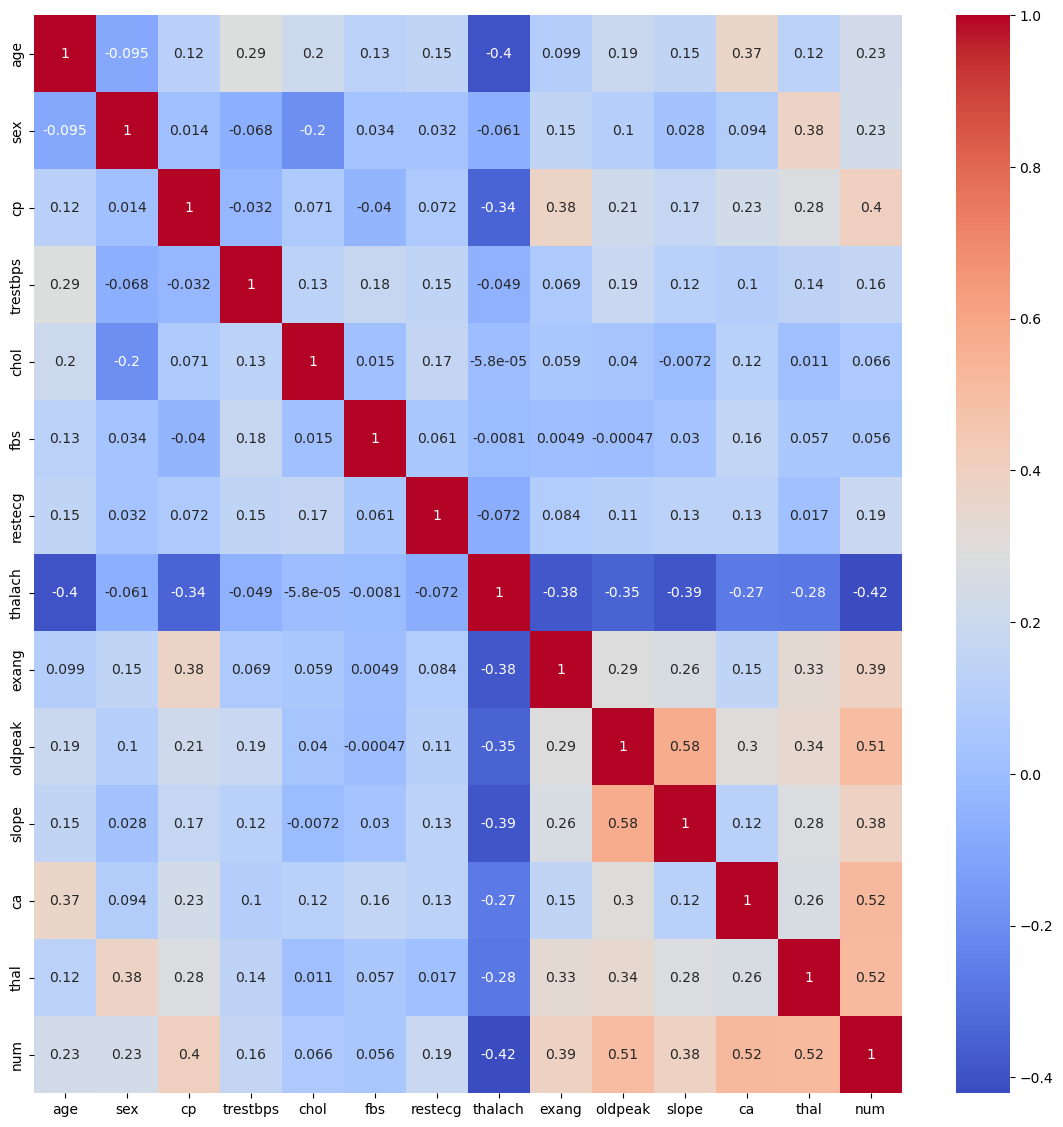

In [14]:
features = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]

plt.figure(figsize=(14,14))
sns.heatmap(dataset.corr(), annot=True, xticklabels = features, yticklabels= features, cmap="coolwarm")

## Training and evaluating the model

In [28]:
training_x, testing_x, training_y, testing_y = train_test_split(xs, ys, test_size=0.2)

model.fit(training_x, training_y)

predictions = model.predict(testing_x)
rounded = [round(pred) for pred in predictions]

print(f"R2 Score: {r2_score(testing_y, predictions)}")
print(f"Rounded R2 Score: {r2_score(testing_y, rounded)}")

R2 Score: 0.5891337596434478
Rounded R2 Score: 0.6075581395348837


## Pretty Bad!

The R2 scores over 10 trials ranged from slightly above 0.6 to 0.39. This is a wide range of low scores, proving that this model does not do a good job.